In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Read the CSV file into a pandas DataFrame
df_raw = pd.read_csv('gpt_SentAnalysis_eng_to_spa.csv')

In [27]:
df_raw.head(1)

,Original,gpt4,eng_sadness,eng_joy,eng_love,eng_anger,eng_fear,eng_surprise,spa_sadness,spa_joy,spa_love,spa_anger,spa_fear,spa_surprise
0,"1. Hi everybody, it's your old pal Sarah. Over the past few months, there's been a lot of press, a lot of gowns, a lot of things. And I was in a gown.","1. Hola a todos, soy vuestra vieja amiga Sarah. Durante los últimos meses, ha habido mucha prensa, muchos vestidos, muchas cosas. Y yo llevaba un vestido.",0.007062,0.072203,0.001579,0.904068,0.013819,0.001267,0.010322,0.909404,0.006628,0.060647,0.011391,0.001609


## Note: the sentiments within each language are relative: in each sample the values add up to 1.0 for Spanish and for English.

In [28]:
ordered_columns = ['eng_sadness', 'spa_sadness', 
                   'eng_joy', 'spa_joy', 
                   'eng_love', 'spa_love', 
                   'eng_anger', 'spa_anger', 
                   'eng_fear', 'spa_fear', 
                   'eng_surprise', 'spa_surprise']

# Create a new DataFrame with the columns reordered
df = df_raw[ordered_columns]
df.head()

,eng_sadness,spa_sadness,eng_joy,spa_joy,eng_love,spa_love,eng_anger,spa_anger,eng_fear,spa_fear,eng_surprise,spa_surprise
0,0.007062,0.010322,0.072203,0.909404,0.001579,0.006628,0.904068,0.060647,0.013819,0.011391,0.001267,0.001609
1,0.061272,0.026079,0.006225,0.121941,0.001015,0.002988,0.770540,0.818770,0.157143,0.028719,0.003804,0.001503
2,0.045625,0.039704,0.007278,0.443217,0.014571,0.024511,0.231334,0.451561,0.699258,0.037559,0.001935,0.003449
3,0.003146,0.026502,0.988669,0.779634,0.001564,0.011363,0.003375,0.150893,0.002894,0.028866,0.000352,0.002743
4,0.097952,0.032896,0.007664,0.617970,0.001075,0.020734,0.143146,0.259105,0.748272,0.065417,0.001891,0.003878


In [29]:
# Find the index of the maximum sentiment score for each row for English sentiments
df['eng_highest_sent'] = df[['eng_sadness', 'eng_joy', 'eng_love', 'eng_anger', 'eng_fear', 'eng_surprise']].idxmax(axis=1)

# Find the index of the maximum sentiment score for each row for Spanish sentiments
df['spa_highest_sent'] = df[['spa_sadness', 'spa_joy', 'spa_love', 'spa_anger', 'spa_fear', 'spa_surprise']].idxmax(axis=1)

C:\Users\blw3912\AppData\Local\Temp\ipykernel_24368\1552039461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['eng_highest_sent'] = df[['eng_sadness', 'eng_joy', 'eng_love', 'eng_anger', 'eng_fear', 'eng_surprise']].idxmax(axis=1)


In [30]:
# Remove the prefix "eng_" from each entry in the 'eng_highest_sent' column
df['eng_highest_sent'] = df['eng_highest_sent'].str.replace('eng_', '')

# Remove the prefix "spa_" from each entry in the 'spa_highest_sent' column
df['spa_highest_sent'] = df['spa_highest_sent'].str.replace('spa_', '')

# Calculate the number of matching values
matching_count = (df['eng_highest_sent'] == df['spa_highest_sent']).sum()

top_emotion_accuracy = matching_count/df.shape[0]*100
print(np.round(top_emotion_accuracy),"% of the phrases have the same top-ranked emotion in each language.")

50.0 % of the phrases have the same top-ranked emotion in each language.


## It's surprising that the idioms do worse than DeepTranslator on top-ranked emotions.  Could it be due to the samples being too short to accurately capture emotion?

In [31]:
# I don't think I ended up using this, 
# I was just playing around to see if we had ok sentiment matches in general, since there were ZERO matches on top sentiment

df['eng_positive'] = df['eng_joy'] + df['eng_love']
df['spa_positive'] = df['spa_joy'] + df['spa_love']

df['eng_negative'] = df['eng_sadness'] + df['eng_anger'] + df['eng_fear']
df['spa_negative'] = df['spa_sadness'] + df['spa_anger'] + df['spa_fear']

df['eng_neutral'] = df['eng_surprise']
df['spa_neutral'] = df['spa_surprise']

In [32]:
# Summary statistics for rows
#row_summary = df.describe()

# Summary statistics for columns
col_summary = df[2:].describe()

# Overall summary statistics
overall_summary = df.describe().describe()

# Output the summary statistics
#print("Summary statistics for rows:")
#print(row_summary)
#print("\nSummary statistics for columns:")
#print(col_summary)
print("Column summary statistics\nfor idioms")
col_summary

Column summary statistics
for idioms


,eng_sadness,spa_sadness,eng_joy,spa_joy,eng_love,spa_love,eng_anger,spa_anger,eng_fear,spa_fear,eng_surprise,spa_surprise,eng_positive,spa_positive,eng_negative,spa_negative,eng_neutral,spa_neutral
count,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000
mean,0.097341,0.025698,0.504723,0.595139,0.032947,0.010163,0.228768,0.309715,0.110086,0.055321,0.026135,0.003963,0.537670,0.605303,0.436195,0.390734,0.026135,0.003963
std,0.245946,0.025437,0.422486,0.235631,0.141181,0.019512,0.316432,0.205858,0.239685,0.071854,0.134235,0.001723,0.422883,0.234925,0.420400,0.234237,0.134235,0.001723
min,0.000208,0.000780,0.000193,0.007328,0.000110,0.000793,0.000130,0.001114,0.000088,0.000486,0.000104,0.000236,0.000422,0.008654,0.000464,0.002381,0.000104,0.000236
25%,0.001931,0.016715,0.032885,0.437251,0.000738,0.005804,0.002628,0.159709,0.001077,0.027622,0.000524,0.002891,0.046738,0.450177,0.012407,0.215597,0.000524,0.002891
50%,0.009063,0.022251,0.507811,0.636201,0.001911,0.008051,0.039982,0.264867,0.008519,0.042662,0.001254,0.003854,0.650625,0.647334,0.257903,0.348102,0.001254,0.003854
75%,0.031437,0.029909,0.973523,0.770408,0.004141,0.011329,0.397688,0.438075,0.055808,0.062493,0.003145,0.004886,0.981079,0.779902,0.936894,0.545707,0.003145,0.004886
max,0.998985,0.470151,0.998977,0.995898,0.994814,0.465644,0.997967,0.967075,0.997606,0.946204,0.991056,0.015744,0.999341,0.997383,0.999452,0.988251,0.991056,0.015744


In [33]:
# Extract English and Spanish sentiment columns
eng_sentiments = np.array(df[['eng_sadness', 'eng_joy', 'eng_love', 'eng_anger', 'eng_fear', 'eng_surprise']])
spa_sentiments = np.array(df[['spa_sadness', 'spa_joy', 'spa_love', 'spa_anger', 'spa_fear', 'spa_surprise']])

#eng_sentiments_simpl = np.array(df[['eng_positive', 'eng_negative', 'eng_neutral']])
#spa_sentiments_simpl = np.array(df[['spa_positive', 'spa_negative', 'spa_neutral']])


# Calculate stats for the difference between English and Spanish sentiments for each sentiment category
difference = eng_sentiments - spa_sentiments
abs_difference = abs(eng_sentiments - spa_sentiments)

abs_difference[np.isnan(abs_difference)] = 0

mean_abs_difference = np.mean(abs_difference, axis=0)

std_difference = np.std(abs_difference, axis=0)

min_difference = np.min(abs_difference, axis=0)

max_difference = np.max(abs_difference, axis=0)


concatenated_arrays = pd.concat([pd.Series(mean_abs_difference), pd.Series(std_difference), pd.Series(min_difference), pd.Series(max_difference)], axis=1)
concatenated_arrays.columns = ['Mean Absolute Difference', 'Standard Deviation', 'Minimum Absolute Difference', 'Maximum Absolute Difference']
concatenated_arrays.index = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
print('Statistics for absolute differences between English and Spanish Sentiments')
concatenated_arrays

Statistics for absolute differences between English and Spanish Sentiments


,Mean Absolute Difference,Standard Deviation,Minimum Absolute Difference,Maximum Absolute Difference
Sadness,0.097708,0.234840,0.0,0.994493
Joy,0.379345,0.244934,0.0,0.985449
Love,0.036608,0.138716,0.0,0.989675
Anger,0.283556,0.205694,0.0,0.940162
Fear,0.116764,0.215282,0.0,0.983033
Surprise,0.026437,0.133033,0.0,0.984758


In [34]:
difference = np.nan_to_num(difference)

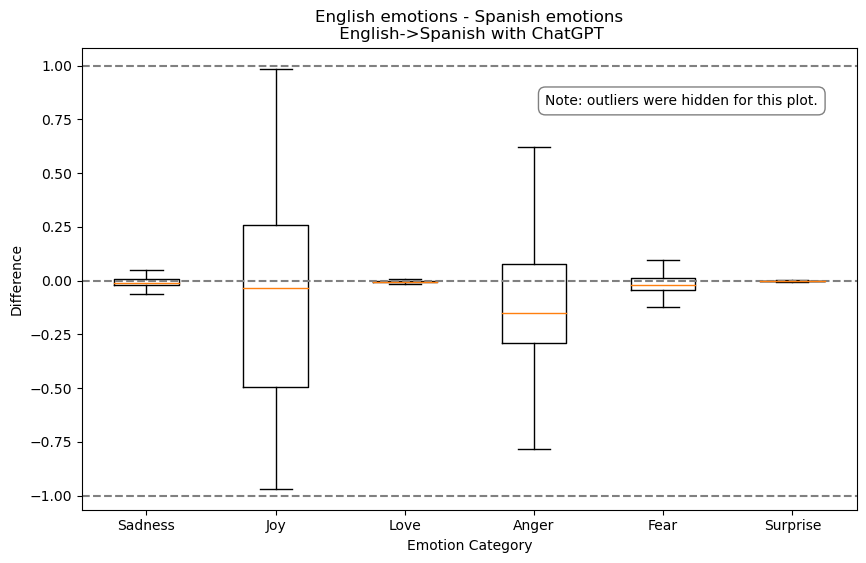

In [35]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(difference, labels=['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'], showfliers=False)
plt.title('English emotions - Spanish emotions\n English->Spanish with ChatGPT')
plt.xlabel('Emotion Category')
plt.ylabel('Difference')
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(1, color='gray', linestyle='--')
plt.axhline(-1, color='gray', linestyle='--')

plt.text(0.95, 0.90, 'Note: outliers were hidden for this plot.', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))


plt.show()

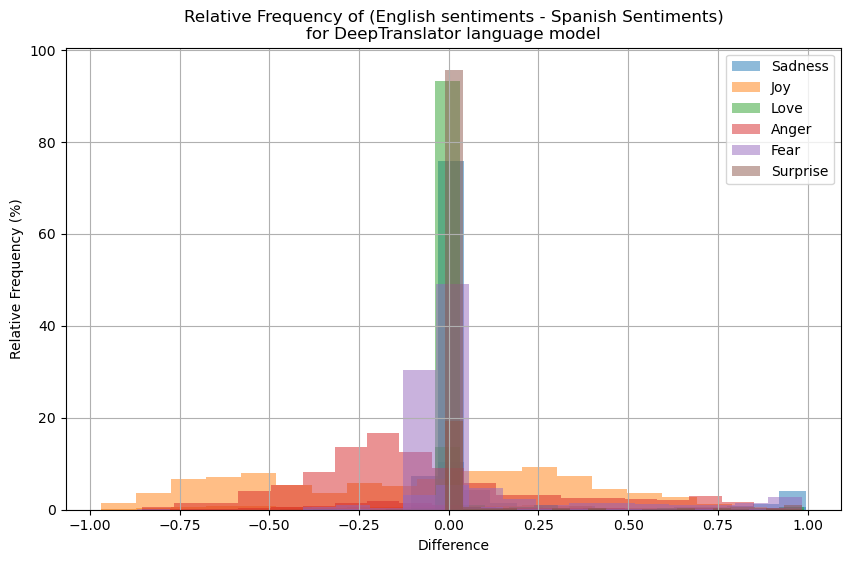

In [13]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms for each sentiment category
legend_handles = []  # To store legend handles
for i, sentiment in enumerate(['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']):
    counts, bins, _ = ax.hist(difference[:, i], bins=20, alpha=0.5, density=True, label=sentiment)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    percent = counts / counts.sum() * 100
    bars = ax.bar(bin_centers, percent, width=(bins[1] - bins[0]), alpha=0.5)
    legend_handles.append(bars[0])  # Store only the first bar for each sentiment category

# Add labels and title
ax.set_title('Relative Frequency of (English sentiments - Spanish Sentiments)\nfor DeepTranslator language model')
ax.set_xlabel('Difference')
ax.set_ylabel('Relative Frequency (%)')

# Add legend with single entry for each sentiment category
ax.legend(legend_handles, ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])

# Display the plot
plt.grid(True)
plt.show()

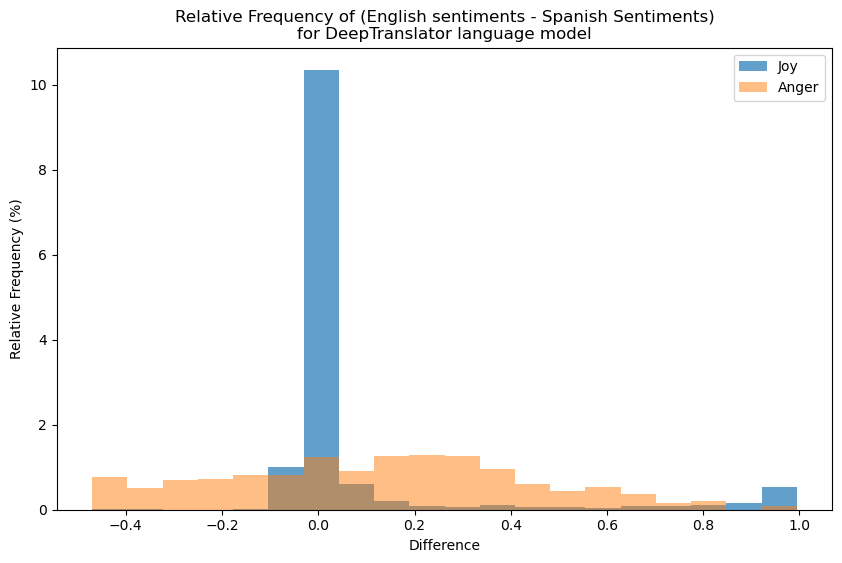

In [14]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 6))

# Define custom colors for each sentiment category
colors = ['#1f77b4', '#ff7f0e']

# Plot histogram for 'Joy' sentiment category
counts_joy, bins_joy, _ = plt.hist(difference[:, 0], bins=20, density=True, alpha=0.7, color=colors[0], label='Joy')

# Plot histogram for 'Anger' sentiment category on the same axes
counts_anger, bins_anger, _ = plt.hist(difference[:, 1], bins=bins_joy, density=True, alpha=0.5, color=colors[1], label='Anger')

# Add labels and title
plt.title('Relative Frequency of (English sentiments - Spanish Sentiments)\nfor DeepTranslator language model')
plt.xlabel('Difference')
plt.ylabel('Relative Frequency (%)')

# Add legend
plt.legend()

# Display the plot
plt.show()


In [38]:
diff_df = pd.DataFrame(difference).rename(columns={0:'Sadness', 1:'Joy', 2:'Love', 3:'Anger', 4:'Fear', 5:'Surprise'})

# Define the condition for masking
mask = diff_df['Joy'] > 0.75

# Apply the mask to filter rows in df_raw
masked_df_raw = df_raw[mask]

# Display the masked DataFrame
print(masked_df_raw.shape[0]," rows, or ",np.round(masked_df_raw.shape[0]/df_raw.shape[0]*100,2), "% of the original rows have a large discrepency in Joy values (greater than 75 percentage points higher in English)")

# Export masked_df_raw to a specific file path
masked_df_raw['Original'].to_csv('high_discrepency_Joy_ChatGPT_Eng_to_Spa.csv', index=False)

pd.set_option('display.max_colwidth', None)
pd.DataFrame(masked_df_raw['Original'])

17  rows, or  2.34 % of the original rows have a large discrepency in Joy values (greater than 75 percentage points higher in English)


,Original
5,"6. There's a slit in the Spanx that you pull up through a hole, right. And I just thought it would be interesting to mention,"
13,"14. When you because I've never been able to do that. Like, I feel like it still gets everywhere. Did you manage a clean pee?"
33,10. But then I also know they say like seat seats are like the cleanest?
46,"13. Thanks, Mark."
196,I don't think i've ever seen you in a hat in sixteen years.
269,"Really, yeah."
275,"Okay, well, this feels like the perfect transition to talk about your album, Highly Sensitive Person. But wait, let's we should pause real quick, like why am I even talking right now? I mean, this is our first Add To Cart music cue interview. We're gonna listen to some of your songs. We're going to ask you questions. But again, why am I talking when we have a veteran MTV News person in our midst?"
334,"Yes, yeah."
366,"Classy ratchet, you know."
380,"Here we gotta get it clean, are you ready?"


# For the original text, the median length is 148.5

In [39]:
string_lengths = df_raw['Original'].apply(len)

# Calculate the average and median lengths
average_length = string_lengths.mean()
median_length = string_lengths.median()

print("Average length:", average_length)
print("Median length:", median_length)

Average length: 375.59065934065933
Median length: 148.5


# If we subset the original text by rows with small average abs diff, do we get a different average length? YES- the median is 59!

In [36]:
string_lengths = masked_df_raw['Original'].apply(len)

average_length = string_lengths.mean()
median_length = string_lengths.median()

print("Average length:", average_length)
print("Median length:", median_length)

Average length: 109.58823529411765
Median length: 59.0


# Trying to do more stats with I'm not stoked on the results
Probably just want to drop these cells, but I wasn't sure yet.

In [ ]:
abs_diff_df = pd.DataFrame(abs_difference).rename(columns={0:'Sadness', 1:'Joy', 2:'Love', 3:'Anger', 4:'Fear', 5:'Surprise'})
abs_diff_df

In [ ]:
from scipy.stats import ttest_1samp

sentiments = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
# Perform one-sample t-test for each category
alpha = 0.05  # significance level

for sentiment in sentiments:
    stat, p_value = ttest_1samp(abs_diff_df[sentiment], 0)
    print(f"Sentiment: {sentiment}")
    print(f"Test statistic: {stat}")
    print(f"P-value: {p_value}")
    
    if p_value < alpha:
        print("Null hypothesis rejected: There is evidence that the true absolute difference is not equal to 0.")
    else:
        print("Fail to reject the null hypothesis: There is no evidence that the true absolute difference is not equal to 0.")
    print()